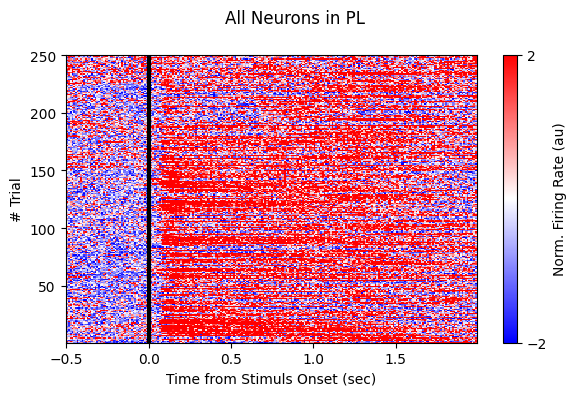

In [19]:
colormap = 'bwr'
plot_clim = [-2,2]

tmp_reg = 'PL'
idx_reg = [idx for idx,reg in enumerate(brain_reg) if reg==tmp_reg]

zs_fr_reg = np.zeros((len(idx_reg), dat['spks'].shape[1], dat['spks'].shape[2])) * np.nan
for neuron_i,idx in enumerate(idx_reg):
    tmp_n_ave = np.nanmean(np.nanmean(dat['spks'][idx,:,timestamps<0], axis=1))
    tmp_n_std = np.nanstd(np.nanmean(dat['spks'][idx,:,timestamps<0], axis=1))
    zs_fr_reg[neuron_i] = (dat['spks'][idx] - tmp_n_ave) / tmp_n_std


plt.figure(figsize=(6,4))
plt.pcolor(timestamps, np.arange(1,tr_num+1), np.nanmean(zs_fr_reg, axis=0), cmap=colormap, rasterized=True, clim=plot_clim)

plt.xlabel('Time from Stimuls Onset (sec)')
plt.ylabel('# Trial')
plt.axvline(0, color='k', lw=3)

plt.colorbar(ticks=plot_clim, label='Norm. Firing Rate (au)')
plt.suptitle(f'All Neurons in {tmp_reg}')
plt.tight_layout()